In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd /content/drive/MyDrive/Colab \Notebooks/microscopy_self_supervised_learning/

/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# metadata with moa
full_meta = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/full_meta.csv")
full_meta.head(3)

,Unnamed: 0,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
0,0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
1,1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
2,2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors


In [ ]:
#column clean-up
full_meta = full_meta.drop(columns=["compound", "concentration"])

full_meta = full_meta.rename(columns={
    "Image_Metadata_Compound": "compound",
    "Image_Metadata_Concentration": "concentration",
    "Image_Metadata_Plate_DAPI": "plate",
    "Image_Metadata_Well_DAPI": "well"
})

full_meta.columns

Index(['Unnamed: 0', 'TableNumber', 'ImageNumber', 'Image_FileName_DAPI',
       'Image_PathName_DAPI', 'Image_FileName_Tubulin',
       'Image_PathName_Tubulin', 'Image_FileName_Actin',
       'Image_PathName_Actin', 'plate', 'well', 'Replicate', 'compound',
       'concentration', 'moa'],
      dtype='object')

In [ ]:
#Basic sanity check
print("Total rows:", len(full_meta))
print("Unique compounds:", full_meta["compound"].nunique())
print("Unique MOAs:", full_meta["moa"].nunique())
print(full_meta["moa"].value_counts())

Total rows: 300
Unique compounds: 5
Unique MOAs: 5
moa
Microtubule stabilizers      108
DMSO                          72
Aurora kinase inhibitors      72
Actin disruptors              24
Microtubule destabilizers     24
Name: count, dtype: int64


In [ ]:
full_meta.duplicated().sum() #any duplicates

np.int64(0)

In [24]:
#replacing this with the previous data
full_meta.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/metadata_with_moa.csv",
    index=False
)

In [25]:
metadata_with_moa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/metadata/metadata_with_moa.csv")
metadata_with_moa.head(3)

,Unnamed: 0,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,plate,well,Replicate,compound,concentration,moa
0,0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors
1,1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors
2,2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,Actin disruptors


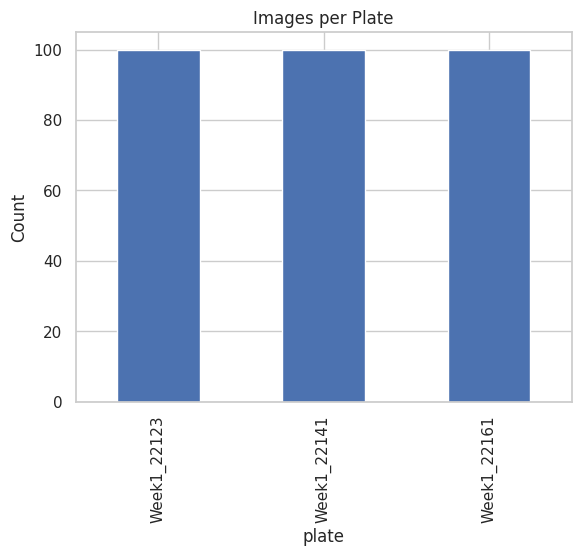

In [ ]:
#Plate and well coverage
metadata_with_moa["plate"].value_counts().plot(kind="bar")
plt.title("Images per Plate")
plt.ylabel("Count")
plt.show()

In [ ]:
#Missing MOa
missing = metadata_with_moa[metadata_with_moa["moa"].isna()]

print("Images without MOA:", len(missing))
missing["compound"].value_counts().head(10)

Images without MOA: 0


,count
compound,


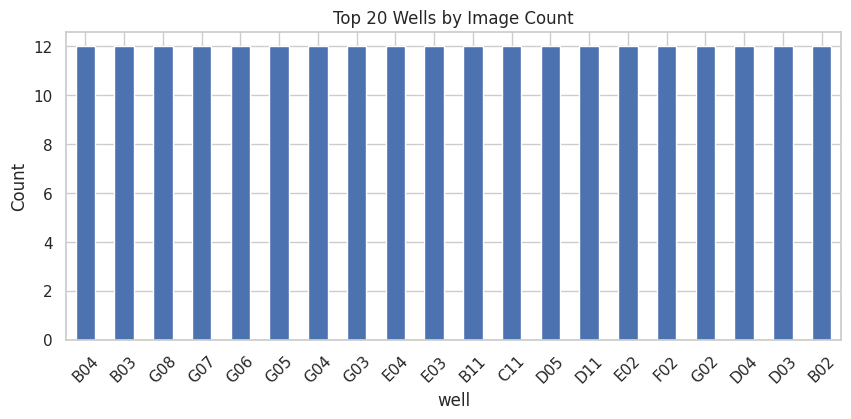

In [ ]:
metadata_with_moa["well"].value_counts().head(20).plot(kind="bar", figsize=(10,4))
plt.title("Top 20 Wells by Image Count")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Step 1: Compound vs MOA mapping

In [11]:
metadata_with_moa.columns

Index(['Unnamed: 0', 'TableNumber', 'ImageNumber', 'Image_FileName_DAPI',
       'Image_PathName_DAPI', 'Image_FileName_Tubulin',
       'Image_PathName_Tubulin', 'Image_FileName_Actin',
       'Image_PathName_Actin', 'plate', 'well', 'Replicate', 'compound',
       'concentration', 'moa'],
      dtype='object')

In [12]:
metadata_with_moa[['compound','moa']].drop_duplicates().value_counts() #So that each compund maps to a consistent MOA
# how many compounds per MOA class

,,count
compound,moa,
AZ-A,Aurora kinase inhibitors,1
DMSO,DMSO,1
cytochalasin B,Actin disruptors,1
nocodazole,Microtubule destabilizers,1
taxol,Microtubule stabilizers,1


conclusion:
No compound appears with multiple MOAs

Step 2: Plates & batch effects

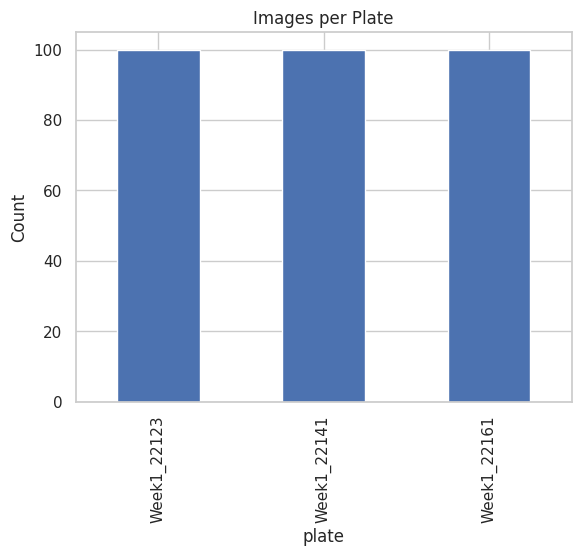

In [18]:
metadata_with_moa['plate'].value_counts().plot(kind='bar') #UMAP later colored by plate (important for batch bias).
plt.title("Images per Plate")
plt.ylabel("Count")
plt.show()

Step 3: Concentration vs MOA

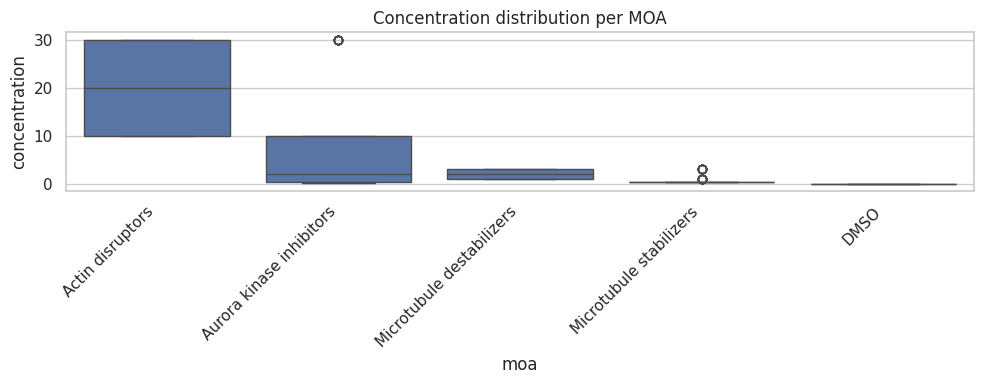

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(data=metadata_with_moa, x='moa', y='concentration')
plt.xticks(rotation=45, ha='right')
plt.title("Concentration distribution per MOA")
plt.tight_layout()
plt.show()

Conclucion : some MOAs only present at high or low doses

Step 4: Replicate counts

In [29]:
rep_counts =  metadata_with_moa.groupby(['compound','concentration']).size()
rep_counts.describe()

,0
count,14.000000
mean,21.428571
std,24.082277
min,12.000000
25%,12.000000
50%,12.000000
75%,12.000000
max,84.000000


Text(0, 0.5, 'Frequency')

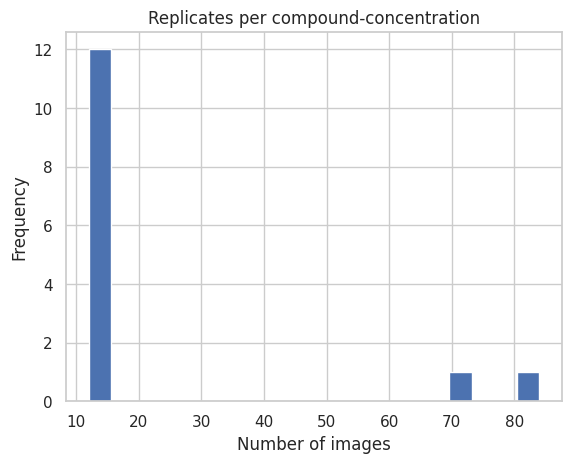

In [31]:
rep_counts.plot(kind='hist', bins=20, title="Replicates per compound-concentration")
plt.xlabel("Number of images")
plt.ylabel("Frequency")

Conclusion:

We have 14 unique (compound, concentration) conditions

Most conditions have 12 replicates

One condition has 84 replicates (outlier)

High std (24) → imbalance

most conditions = 12 samples

one condition = 84 samples

So model could bias toward that condition

MOA classes may be skewed

may need to downsample later or weight loss or aggregate replicates

Outlier :“Most compound–concentration conditions have approximately 12 replicate images, reflecting the experimental design. A small number of treatments are overrepresented with more than 70 replicates, likely due to repeated measurements across plates. This imbalance motivates aggregating features per treatment and using compound-level cross-validation in downstream analysis.”

In [33]:
rep_counts.sort_values(ascending=False).head(10)

compound        concentration
taxol           0.3              84
DMSO            0.0              72
AZ-A            1.0              12
                3.0              12
                0.1              12
                0.3              12
                30.0             12
                10.0             12
cytochalasin B  30.0             12
                10.0             12
dtype: int64

Connclusion :

1. Taxol is overrepresented in the dataset.

It is likely used as a positive control.

Appears across multiple plates and replicates.

Researchers want very reliable phenotypes for it.

2. DMSO is the negative control (no drug effect).

DMSO is heavily replicated as a baseline reference condition.

Cells treated with DMSO represent the “normal” phenotype.

It is included in every plate for calibration and QC.

Step 5: Control vs treated

In [26]:
metadata_with_moa['is_control'] = metadata_with_moa['compound']=='DMSO'
metadata_with_moa['is_control'].value_counts()

,count
is_control,
False,228
True,72


DMSO = negative control

used for normalization later

baseline phenotype

72 images are DMSO (control)

228 images are drug-treated

Total = 300 images

Text(0.5, 1.0, 'Control vs treated per plate')

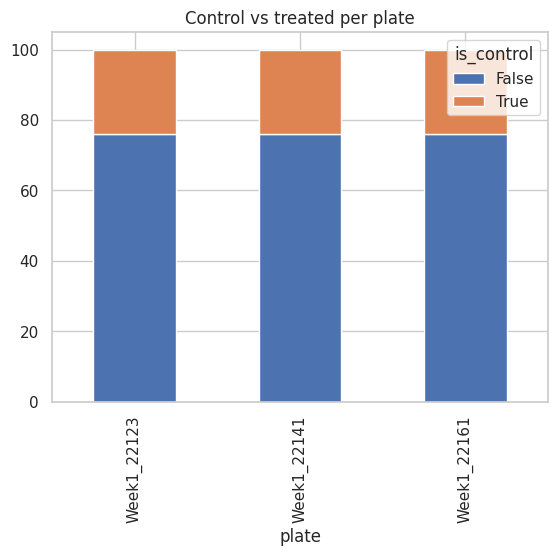

In [28]:
metadata_with_moa.groupby(['plate','is_control']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Control vs treated per plate")